# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Импортируем данные о скважинах в первом регионе

In [137]:
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    print('Ошибка. Проверьте правильность пути к данным')
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [138]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [139]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [140]:
geo_data_0.duplicated().value_counts()

False    100000
dtype: int64

Пропусков и дубликатов в данных нет. Посмотрим на корреляцию между признаками.

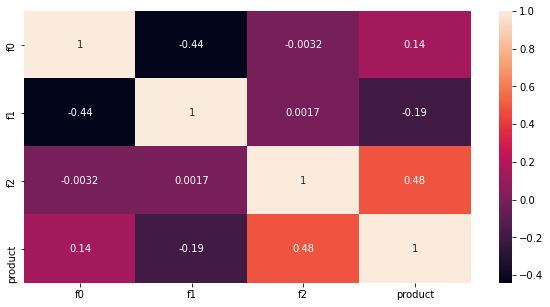

In [141]:
corrMatrix = geo_data_0.corr()
#Построим корреляционную матрицу
plt.figure(figsize=(10, 5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

Импортируем данные о скважинах во втором регионе

In [142]:
try:
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    print('Ошибка. Проверьте правильность пути к данным')
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [143]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [144]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [145]:
geo_data_1.duplicated().value_counts()

False    100000
dtype: int64

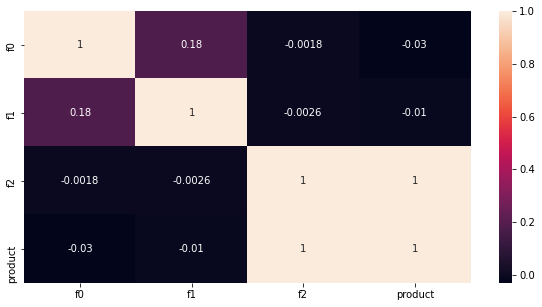

In [146]:
#Построим корреляционную матрицу
corrMatrix = geo_data_1.corr()
plt.figure(figsize=(10, 5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

Импортируем данные о скважинах в третьем регионе

In [147]:
try:
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    print('Ошибка. Проверьте правильность пути к данным')
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [148]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [149]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [150]:
geo_data_2.duplicated().value_counts()

False    100000
dtype: int64

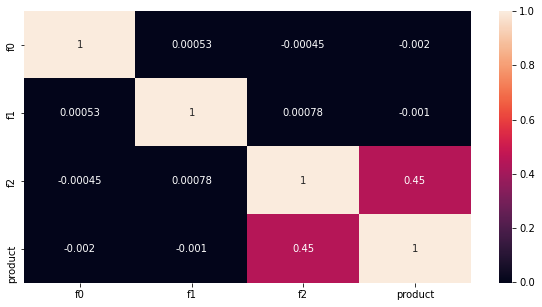

In [151]:
#Построим корреляционную матрицу
corrMatrix = geo_data_2.corr()
plt.figure(figsize=(10, 5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

**Вывод:**  Данные обо всех трех регионах выглядят адекватно пропусков и дубликатов нет. Корреляция между признаками не высока. 
Во втором регионе есть высокая корреляция между продуктом и признаком f2, скорее всего это значит, что объём добываемой нефти в данном регионе почти полностью зависит от этого признака. 

In [152]:
# удалим столбец id, для работы с моделями он нам не нужен.
geo_data_0 = geo_data_0.drop('id', axis=1)
geo_data_1 = geo_data_1.drop('id', axis=1)
geo_data_2 = geo_data_2.drop('id', axis=1)

## Обучение и проверка модели

Обучим модель линейной регрессии

In [153]:
model = LinearRegression()

In [154]:
#создадим функцию которая разобъёт данные на тренировочные и валидационные в пропорции 75:25 и обучит модель
def predictions_target(data):
    features = data.drop('product', axis = 1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    model.fit(features_train, target_train)
    prediction = pd.Series(model.predict(features_valid))
    return prediction, target_valid

Сохраним предсказания и правильные ответы для всех трех регионов на валидационной выборке

In [155]:
predicted_data_0, target_data_0 = predictions_target(geo_data_0)

In [156]:
predicted_data_1, target_data_1 = predictions_target(geo_data_1)

In [157]:
predicted_data_2, target_data_2 = predictions_target(geo_data_2)

In [158]:
#Напишем функцию, которая посчитает средний запас предсказанного сырья и RMSE
def mean_product_and_rmse (answers, predictions):
    mse = mean_squared_error(answers, predictions)
    print('Средний прогнозируемый запас сырья равен {:.2f}'.format(predictions.mean()),'тыс. баррелей')
    print('RMSE:', mse ** 0.5)

In [159]:
print('Первый регион:')
mean_product_and_rmse(target_data_0, predicted_data_0)

Первый регион:
Средний прогнозируемый запас сырья равен 92.59 тыс. баррелей
RMSE: 37.5794217150813


In [160]:
print('Второй регион:')
mean_product_and_rmse(target_data_1, predicted_data_1)

Второй регион:
Средний прогнозируемый запас сырья равен 68.73 тыс. баррелей
RMSE: 0.893099286775617


In [161]:
print('Третий регион:')
mean_product_and_rmse(target_data_2, predicted_data_2)

Третий регион:
Средний прогнозируемый запас сырья равен 94.97 тыс. баррелей
RMSE: 40.02970873393434


Сравним предсказанные запасы сырья с реальными средними запасами по регионам

In [162]:
print('Для первого региона реальный средний запас сырья равен {:.2f}'.format(target_data_0.mean()))
print('Для второго региона реальный средний запас сырья равен {:.2f}'.format(target_data_1.mean()))
print('Для третьего региона реальный средний запас сырья равен {:.2f}'.format(target_data_2.mean()))

Для первого региона реальный средний запас сырья равен 92.08
Для второго региона реальный средний запас сырья равен 68.72
Для третьего региона реальный средний запас сырья равен 94.88


**Вывод:**
Для всех трех регионов предсказанные объемы сырья почти не отличаются от реальных. 
Наилучшее RMSE у модели для второго региона, скорее всего это всязано с высокой корреляцией признака f2 и продукта в этом регионе. RMSE для первого и третьего региона отличаются не сильно.

## Подготовка к расчёту прибыли

Сохраним ключевые значения для рассчётов в отдельные переменные

In [163]:
DOTS_COUNT = 500 #общее число скважен
BEST_DOTS = 200 #количество лучших скважен для разработки
TOTAL_BUDGET = 10000000000 #общий бюджет на скажины в регионе
PROFIT_PER_BARREL = 450 #доход на каждый баррель сырья
PROFIT_TOTAL_ONE = 450000 #доход с каждой единицы продукта
RISK = 0.025 #порог риска 2.5%

Определим минимально необходимый для окупаемости запас нефти в каждой скважине. 

In [164]:
budget_per_dote = TOTAL_BUDGET / BEST_DOTS

In [165]:
product_volume = budget_per_dote / PROFIT_PER_BARREL / 1000
print('Минимальный запас необходимый для окупаемости бурения скважины: {:.2f}'.format(product_volume),'тыс. баррелей.')

Минимальный запас необходимый для окупаемости бурения скважины: 111.11 тыс. баррелей.


**Вывод:** Минимальный объем сырья неодходимый для того, чтобы разработка скважины была окупаемой около 111 тыс. баррелей. Средние значения запасов сырья для всех трех регионов ниже необходимого объема. Это значит, что при осуществлении разработки скважин, выбранных случайным образом, высока вероятность не окупить бюджет на разработку.

Напишем функцию рассчета прибыли для двухсот лучших скважина каждого региона.

In [166]:
def profit(target, probabilities):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:BEST_DOTS]
    return (((PROFIT_TOTAL_ONE * selected.sum()) - TOTAL_BUDGET) / 1000000000)

In [167]:
print('Прибыль 200 лучших скважин в первом регионе: {:.2f} млрд. руб'.format(profit(predicted_data_0, target_data_0)))

Прибыль 200 лучших скважин в первом регионе: 0.50 млрд. руб


In [168]:
print('Прибыль 200 лучших скважин во втором регионе: {:.2f} млрд. руб'.format(profit(predicted_data_1, target_data_1)))

Прибыль 200 лучших скважин во втором регионе: 2.37 млрд. руб


In [169]:
print('Прибыль 200 лучших скважин в третьем регионе: {:.2f} млрд. руб'.format(profit(predicted_data_2, target_data_2)))

Прибыль 200 лучших скважин в третьем регионе: -0.33 млрд. руб


Лучший показатель прибыли у скважин во втором регионе 2.37 млрд.

## Расчёт прибыли и рисков 

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [170]:
#напишем функцию, которая определит среднюю прибыль, 95% доверительный интервал и процент риска для каждого региона.
def bootstrap(target, probabilities, iterations, sample_size):
    state = np.random.RandomState(12345)
    values = []
    for i in range(iterations):
        target_subsample = target.sample(n=sample_size, random_state=state, replace=True)
        probs_subsample = probabilities[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample))

    values = pd.Series(values)
    mean = values.mean()
    risk = (values < 0).mean()
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    return round(mean,2), round(risk, 2), lower, upper

In [171]:
mean_0, risk_0, lower_0, upper_0 = bootstrap(target_data_0.reset_index(drop=True), predicted_data_0, 1000, 500)
print('Данные по первому региону.')
print('Средняя прибыль по региону: {:.2f} млрд. руб.'.format(mean_0))
print('95% доверительный интервал от {:.2f} до {:.2f} млрд. руб.'.format(lower_0, upper_0))
print('Процент риска {:.1%}'.format(risk_0))

Данные по первому региону.
Средняя прибыль по региону: 0.40 млрд. руб.
95% доверительный интервал от -0.11 до 0.91 млрд. руб.
Процент риска 7.0%


In [172]:
mean_1, risk_1, lower_1, upper_1 = bootstrap(target_data_1.reset_index(drop=True), predicted_data_1, 1000, 500)
print('Данные по второмы региону.')
print('Средняя прибыль по региону: {:.2f} млрд.руб.'.format(mean_1))
print('95% доверительный интервал от {:.2f} до {:.2f} млрд.руб.'.format(lower_1, upper_1))
print('Процент риска {:.1%}'.format(risk_1))

Данные по второмы региону.
Средняя прибыль по региону: 0.46 млрд.руб.
95% доверительный интервал от 0.03 до 0.85 млрд.руб.
Процент риска 2.0%


In [173]:
mean_2, risk_2, lower_2, upper_2 = bootstrap(target_data_2.reset_index(drop=True), predicted_data_2, 1000, 500)
print('Данные по третьему региону.')
print('Средняя прибыль по региону: {:.2f} млрд.руб.'.format(mean_2))
print('95% доверительный интервал от {:.2f} до {:.2f} млрд.руб.'.format(lower_2, upper_2))
print('Процент риска {:.1%}'.format(risk_2))

Данные по третьему региону.
Средняя прибыль по региону: 0.40 млрд.руб.
95% доверительный интервал от -0.16 до 0.95 млрд.руб.
Процент риска 8.0%


**Общий вывод:** Согласно расчитанной средней выручке все три региона являются прибыльными. Но в первом и третьем регионе высока вероятность убытков(7 и 8 процентов соответсвенно) и эти значения не укладываются в условия риска(2.5%).Эта ситуация описывается 95-% доврительным интервалом. Левая граница, которая отделяет 2.5 % данных для 1-го и 3-го регионов принимает отрицательное значение, что говорит о том, что более 2.5 % выборок имеют отрицательную прибыль. Так, что мы не можем рекомендовать к разработке эти регионы
Второй регион оказывается лидером как по средней прибыли(0.46 млрд.руб.). Так и по показателям риска(2%), он единственный уложился в необходимые нам 2.5%. В связи с этим для дальнейшей разработки заказчику предлагается принять только второй регион.